# Practice 11

## Solving PDEs with an spectral method


The contents of this practice are only meant to show an important application of the Discrete Fourier Transform, using the FFT algorithm.

We are just going to explain a very simple example.

Consider the linear heat equation

$$u_t = \nu\, u_{xx} , x \in \mathbb{R},$$

completed with the initial condition

$$u(x, 0) = u_0(x).$$

We consider this equation on the whole line $\mathbb{R}$ for the sake of simplicity. However, *in silico* it will be truncated to a periodic interval (in the example below it will be $I = [-1, 1]$).

Let us apply the Fourier integral transform to the both sides of the PDE:

$$\frac{d\hat{u}(k, t)}{dt}= −\nu k^2 \hat{u}(k, t),$$

where the forward $\hat{u}(k, t) = \mathcal{F}{u(x, t)}$ and inverse $u(x, t) = \mathcal{F}
^{−1}{\hat{u}(k, t)}$ integral Fourier transforms:

$$\hat{u}(k, t):= \mathcal{F}\left\{u(x, t)\right\}=\int_{-\infty}^{\infty}u(x, t) e^{ikx} dx $$

$$u(x, t):= \mathcal{F}^{-1}\left\{\hat{u}(k, t)\right\}=\int_{-\infty}^{\infty}\hat{u}(x, t) e^{-ikx} dk. $$

The transformed heat equation can be regarded as a linear ODE. Its solution can be readily obtained:

$$\hat{u}(k, t) = \hat{u}_0(k) e^{−ν k^2 t}, \qquad \hat{u}_0(k) = \mathcal{F}\left\{u_0(x)\right\} .$$

Consequently, we possess an analytical solution to the heat equation in Fourier space. In order to obtain the solution in physical space, an inverse Fourier transform has to be computed. 

For example, for the initial condition $u_0(x,0)=\text{sech}^2(10x)$ the corresponding solution at $t = 5s$ can be calculated using the following python code:

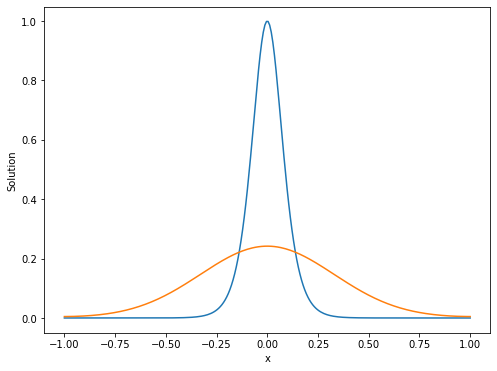

In [51]:
import numpy as np
from matplotlib import pyplot as plt


l  = 1.0                                 # half-length of the domain
N  = 256                                 # number of Fourier modes
dx = 2*l/N                               # distance between two collocation points
x  = np.linspace(-1,1,N)                 # physical space discretization

nu = 0.01                                # diffusion parameter
T = 5.0                                  # time where we compute the solution
dk = np.pi/(2*l)                         # discretization step in Fourier space 

k = np.fft.fftfreq(N,2*l)*N*2*np.pi      # vector of wavenumbers

k2 = k**2                                # 2nd derivative in Fourier space

u0 = 1/np.cosh(10.0*x)**2                # initial condition
u0_hat = np.fft.fft(u0)                  # Its Fourier transform

uT = np.real(np.fft.ifft(np.exp(-nu*k2*T)*u0_hat))   # solution at time t=T=5

plt.figure(figsize = (8, 6))
plt.plot(x,u0)
plt.plot(x,uT)
plt.xlabel('x')
plt.ylabel('Solution')
plt.show()

For those of you who might be interested in this kind of numerical methods here is a good introductory reference:

* Trefethen, L. N. (2000). Spectral methods in MatLab. Society for Industrial and Applied Mathematics, Philadelphia, PA, USA.